In [2]:
from nrclex import NRCLex

import numpy as np
import pandas as pd

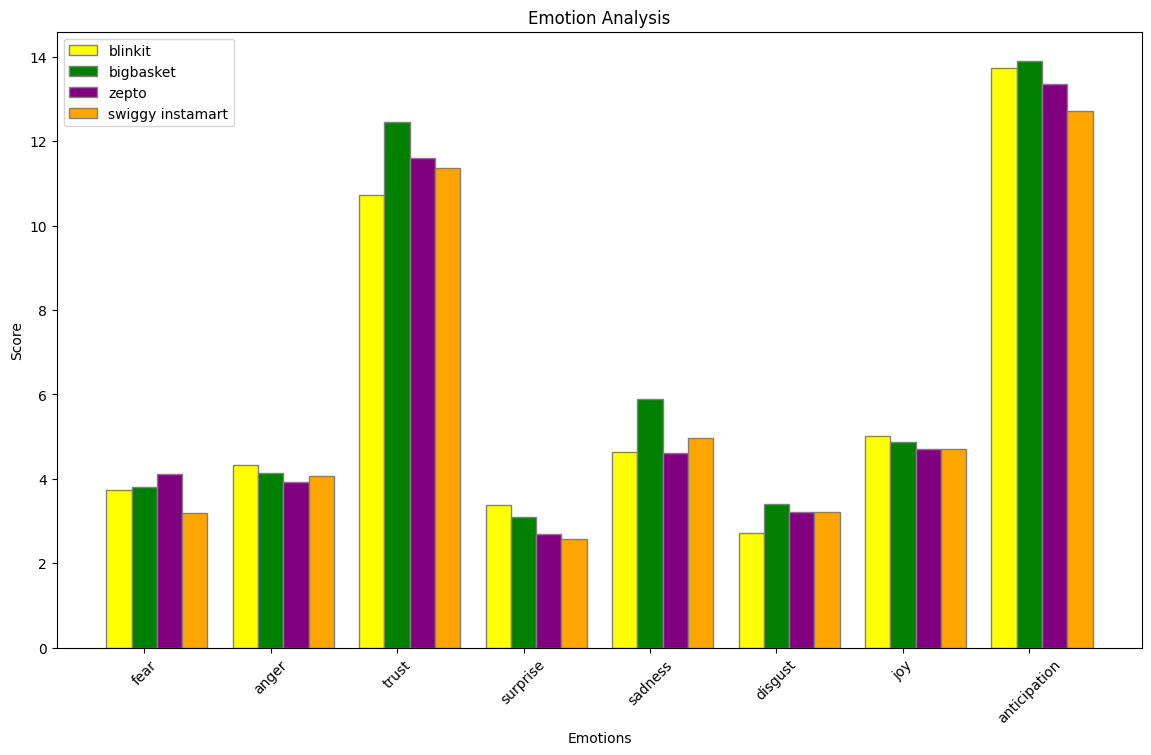

In [3]:

import matplotlib.pyplot as plt

csv_files = ['blinkit_processed_tweets.csv', 
             'bigbasket_processed_tweets.csv', 
             'zepto_processed_tweets.csv', 
             'swiggyinstamart_processed_tweets.csv']


legend_labels = ['blinkit', 'bigbasket', 'zepto', 'swiggy instamart']
def filter_emotions(emotion_dict):
    # Remove positive and negative emotions
    
    filtered_emotions = {emotion: freq for emotion, freq in emotion_dict.items() if emotion not in ['positive', 'negative','anticip']}
    return filtered_emotions

# Dictionary to hold total counts of emotions
total_emotions_counts = {}
# List to hold total counts of emotions for each file
all_emotions_counts = []

# Process each CSV file
for csv_file in csv_files:
    # Load the CSV file
    df = pd.read_csv(csv_file)
    
    # Count the number of rows (tweets)
    num_tweets = len(df)
    
    # Apply the filter_emotions function to each tweet
    df['emotions'] = df['processed_text'].apply(lambda x: filter_emotions(NRCLex(x).affect_frequencies))
    
    # Create a DataFrame from the 'emotions' column with one row per entry
    emotions_df = df['emotions'].apply(pd.Series).fillna(0)
    
    # Normalize the counts for each emotion by the number of tweets
    normalized_emotions_count = emotions_df.sum() / (num_tweets/100)
    
    # Convert to dictionary and store in the list
    total_emotions_count = normalized_emotions_count.to_dict()
    all_emotions_counts.append(total_emotions_count)

# Unique colors for each CSV file plot
colors = ['yellow', 'green', 'purple', 'orange']

# Plotting all bar charts in a single diagram
plt.figure(figsize=(14, 8))
width = 0.2  # width of the bars

# Positions of bars on x-axis
r = np.arange(len(all_emotions_counts[0]))

for i, total_emotions_count in enumerate(all_emotions_counts):
    # Create the bars for each CSV file
    plt.bar(r + i*width, total_emotions_count.values(), color=colors[i], width=width, edgecolor='grey', label=legend_labels[i])

# Add labels and title
plt.xlabel('Emotions')
plt.ylabel('Score')
plt.title('Emotion Analysis')
plt.xticks([r + width for r in range(len(all_emotions_counts[0]))], list(all_emotions_counts[0].keys()), rotation=45)
plt.legend()

# Show the plot
plt.show()